In [3]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import xarray as xr
import seaborn as sns
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PWD : /home/bouissob/Code


In [4]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position_driving = ['thermalDriving', 'halineDriving', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Var_X_BIG_test = ['iceDraft','Big_T', 'Big_S']

Var_X_BIG_Step2 = ['iceDraft','Big_T', 'Big_S', 'Distances_ground_line', 'Distances_front_line']
Var_X_BIG_Extra = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
Var_X_BIG_Slope = ['iceDraft', 'bathymetry', 'Slope_iceDraft', 'Slope_bathymetry', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
Var_X_slopexy = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'temperatureYZ', 'salinityYZ',
                  'Distances_ground_line', 'Distances_front_line']

OcTPlus = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst']
CPLs_test = ['CPL_EXP10_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']

ALL_EXP = ['CPL_EXP10_rst','CPL_EXP11_rst', 'CPL_EXP12_rst','CPL_EXP13_rst','CPL_EXP20_rst','CPL_EXP21_rst','CPL_EXP22_rst', 'CPL_EXP23_rst']
Train_oc_exp = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst','CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']


NEW = ['IceOcean1r_ElmerIce', 'IceOcean1ra_ElmerIce']
NEW_under100supr = ['IceOcean1r_ElmerIce_under100supr', 'IceOcean1ra_ElmerIce_under100supr']
NEW_fill100 = ['IceOcean1r_ElmerIce_fill100', 'IceOcean1ra_ElmerIce_fill100']
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

PWD : /home/bouissob/Code


<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

Number of model used : 1
['Ocean1'] : [3.2203981] Gt/yr _32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean2'] : [2.50126481] Gt/yr 32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean3'] : [3.77720001] Gt/yr 32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean4'] : [0.45457385] Gt/yr 32_Ch_0-1652794247_Ex_                                                   



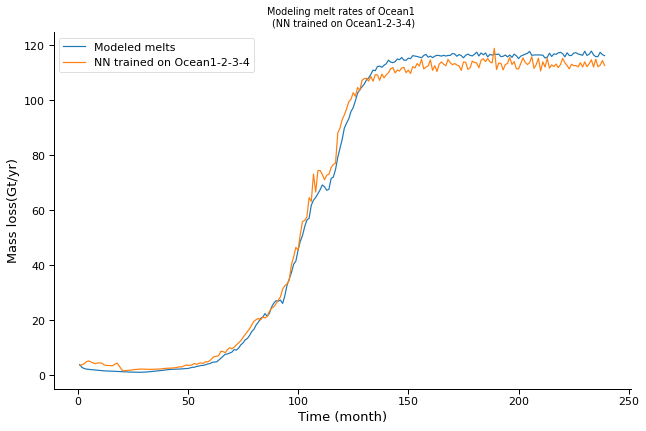

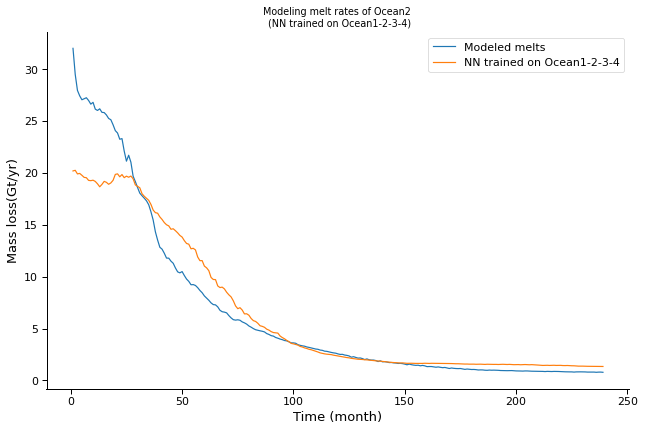

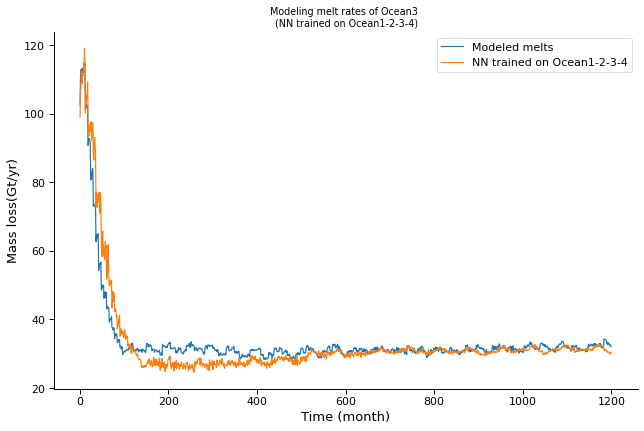

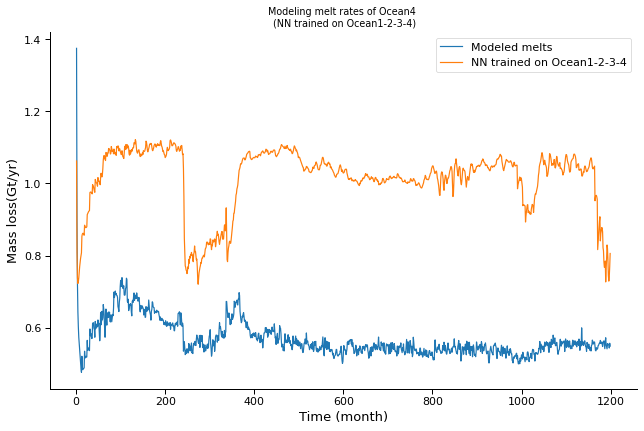

In [52]:
RMSE_ALL = []
New_oc = [['Ocean1', 'Ocean2'], ['Ocean3', 'Ocean4']]
New_oc = [OcT]

for OC in New_oc:
    Mod = [{'Ocean' : OC, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}]
    RMSE_cur = []
    for OC_target in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '')
        RMSE_cur.append(RMSE)
    RMSE_ALL.append(RMSE_cur)

In [8]:
Mod = {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 128, 
   'index' : None, 'return_all' : True}
#for i in range(4):
Mod = {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 128,
       'return_all' : True}
A = Computing_functions.Compute_RMSE_from_model_ocean(Ocean_target = OcT, NN_attributes=Mod)


['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_64_32_Ch_0-1652797706_Ex_', '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_64_32_Ch_0-1652818671_Ex_', '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_64_32_Ch_0-1652819638_Ex_', '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_64_32_Ch_0-1652820565_Ex_']
Data variables used : temperatureYZ salinityYZ iceDraft                                                  
Data variables used : temperatureYZ salinityYZ iceDraft
Data variables used : temperatureYZ salinityYZ iceDraft
Data variables used : temperatureYZ salinityYZ iceDraft
Data variables used : temperatureYZ salinityYZ iceDraft                                                  
Data variables used : temperatureYZ salinityYZ iceDraft
Data variables used : temperatureYZ salinityYZ iceDraft
Data variables used : temperatureYZ salinityYZ iceDraft
Dat

In [9]:
Melt, NN_melts, Oc_mask = A[2], A[3], A[5]

In [10]:
RMSE = []
for Oc in np.unique(Oc_mask):
    print(Oc)
    Mask = np.where(Oc_mask == Oc)
    RMSE.append(Computing_functions.Compute_rmse(Melt[Mask], NN_melts[Mask]))

1.0
2.0
3.0
4.0


In [11]:
RMSE

[2.4865733434526764, 2.2259709258319984, 3.7257148488673106, 1.092451374566169]

In [7]:
RMSE

[3.1823772080213635,
 2.4669585827603746,
 3.3730855442138075,
 1.3333130623503857]

Number of model used : 1


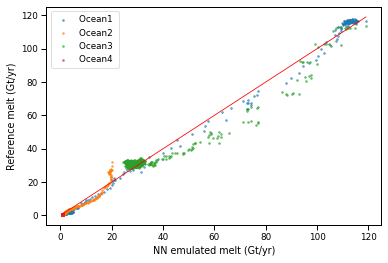

2.7232132711579546


In [54]:
Mod = {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = '', message = 0, Ocean_target = OcT, NN_attributes = Mod, Display_label = False, Display_title = False)

Number of model used : 1


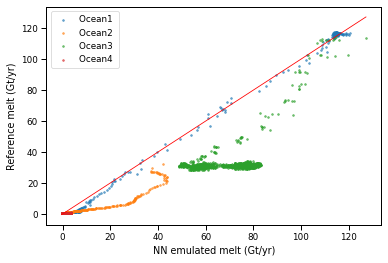

25.414425108421963


In [55]:
Mod = {'Ocean' : 'Ocean1', 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = '', message = 0, Ocean_target = OcT, NN_attributes = Mod, Display_label = False, Display_title = False)

In [ ]:
Mod = [{'Ocean' : 'Ocean1', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean2', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean3', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean4', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean1_Ocean2', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean3_Ocean4', 'Method_data' : 3, 'Neur' : '32_64_32'}
      ]
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '')
    RMSE_cur.append(RMSE)
RMSE_ALL.append(RMSE_cur)

Number of model used : 1
Number of model used : 1_N_32_32_96_96_Ch_0-1652899437_Ex_Comparemeth3-4                                                   


KeyboardInterrupt: 

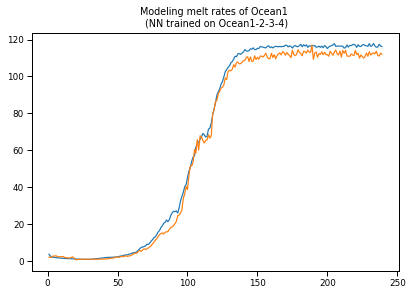

In [27]:
Mod = [{'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_32_96_96', 'Var' : Var_X_non_position, 'Epoch' : 32},
       {'Ocean' : OcT, 'Method_data' : 4, 'Neur' : '32_32_96_96', 'Var' : Var_X_BIG_test, 'Epoch' : 32},
       {'Ocean' : OcT, 'Method_data' : 4, 'Neur' : '32_32_96_96', 'Var' : Var_X_BIG_Step2, 'Epoch' : 32},
       {'Ocean' : OcT, 'Method_data' : 4, 'Neur' : '32_32_96_96', 'Var' : Var_X_BIG_Slope, 'Epoch' : 32},
       {'Ocean' : OcT, 'Method_data' : 4, 'Neur' : '32_32_96_96', 'Var' : Var_X_BIG_Extra, 'Epoch' : 32}
      ]
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Titles = ['T(z) S(z) iceD', '+Distgl-fl', '+slopenorm','slopexy' ])
    RMSE_cur.append(RMSE)


In [ ]:
Model_id = 1646995963
Exp = []
Mod = {'Ocean' : OcT, 'Uniq_id' : Model_id}
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Titles = ['T(z) S(z) iceD', '+Distgl-fl', '+slopenorm','slopexy' ])
    RMSE_cur.append(RMSE)

Number of model used : 1
['CPL_EXP10_rst_under100supr'] : [44.75545264] Gt/yr 4319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP11_rst_under100supr'] : [31.57980682] Gt/yr 4319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP12_rst_under100supr'] : [27.5319357] Gt/yr 04319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP13_rst_under100supr'] : [32.95537479] Gt/yr 4319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP20_rst_under100supr'] : [23.90897012] Gt/yr 4319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP21_rst_under100supr'] : [24.30362105] Gt/yr 4319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP22_rst_under100supr'] : [31.4006204] Gt/yr 04319_Ex_Same_ind                        

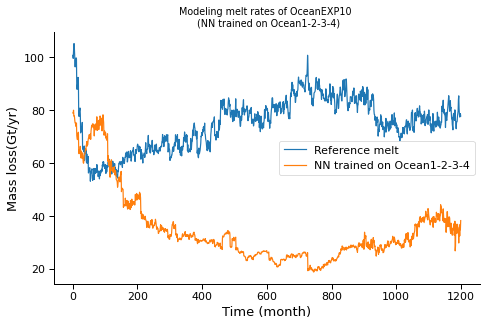

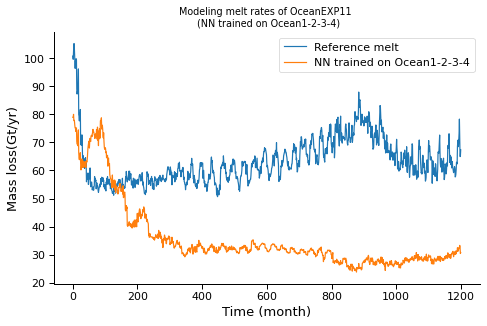

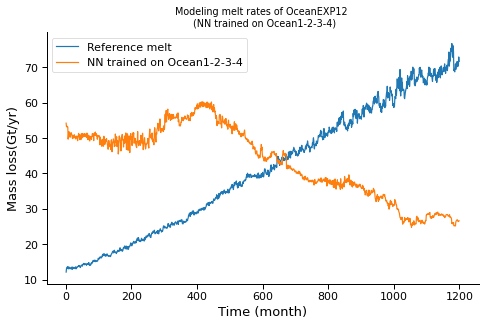

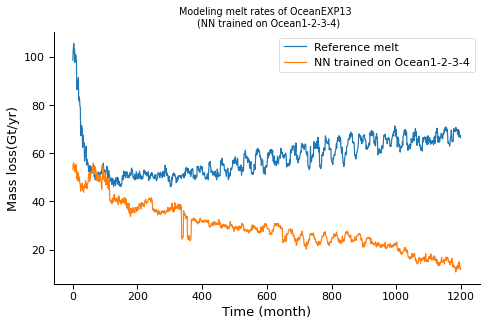

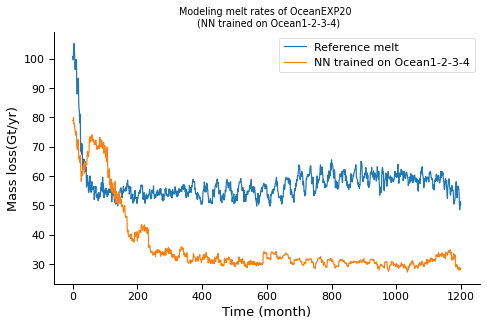

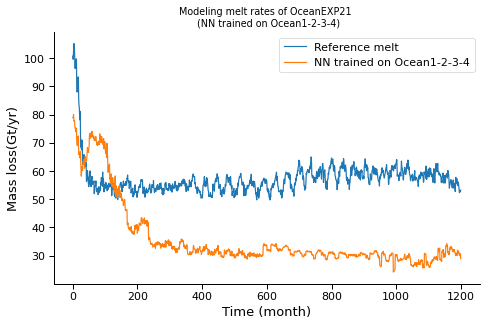

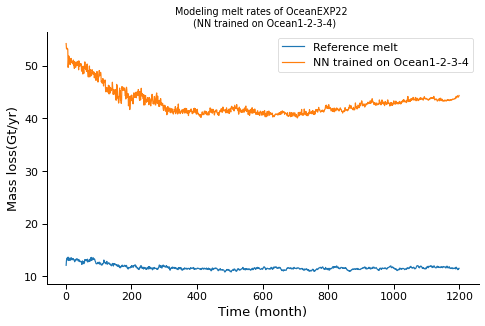

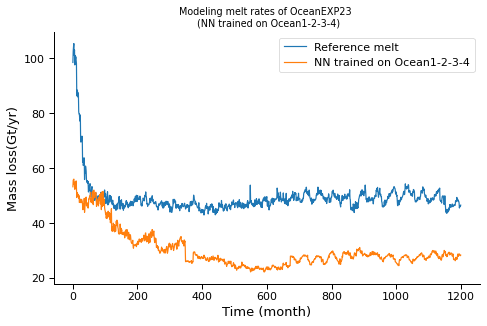

In [7]:
RMSEs = []
Suffix = '_under100supr'
Model_id = 1649604319 # lr /2 ts les 10

for oc in ALL_EXP:
    oc+=Suffix
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Uniq_id' : Model_id}, Save_name = '')[0]
    RMSEs.append(RMSE)

Number of model used : 1
Number of model used : 1_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   
Number of model used : 1_N_96_96_96_96_96_Ch_0-1649628838_Ex_                                                   
['CPL_EXP10_rst'] : [3.01725608] Gt/yr _96_Ch_0-1651150755_Ex_                                                   

Number of model used : 1
Number of model used : 1_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   
Number of model used : 1_N_96_96_96_96_96_Ch_0-1649628838_Ex_                                                   
['CPL_EXP11_rst'] : [10.42016636] Gt/yr 96_Ch_0-1651150755_Ex_                                                   

Number of model used : 1
Number of model used : 1_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   
Number of model used : 1_N_96_96_96_96_96_Ch_0-1649628838_Ex_                                             

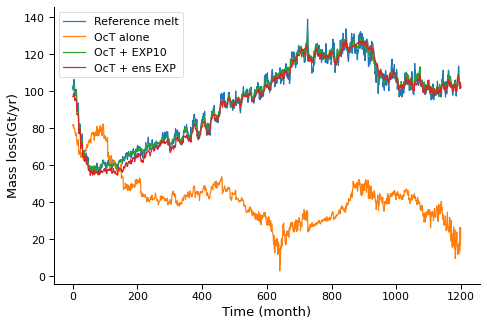

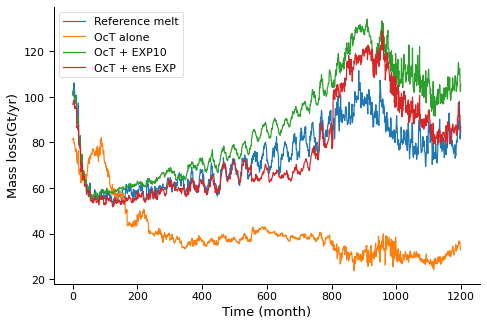

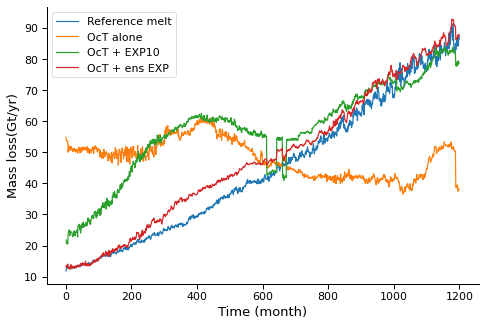

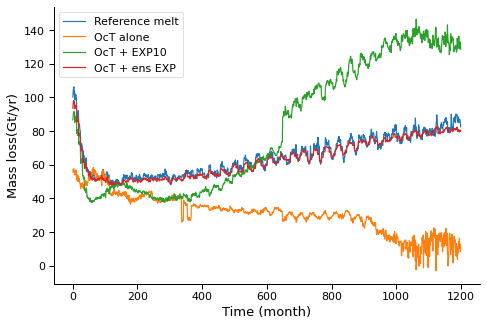

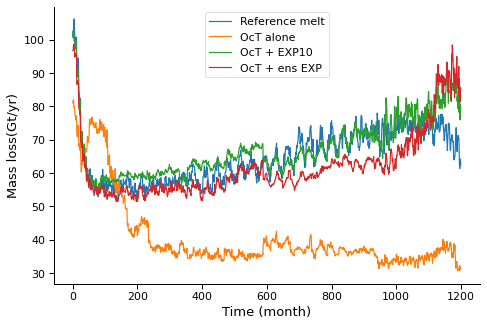

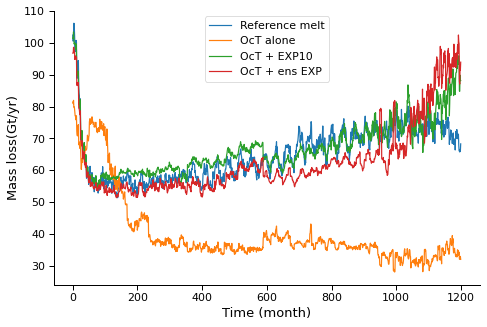

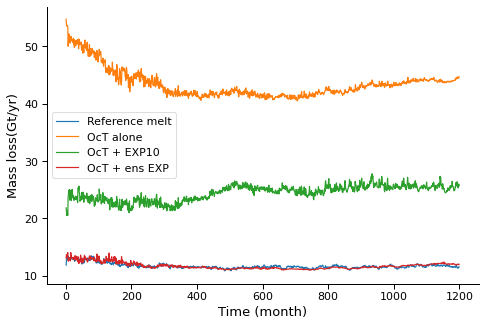

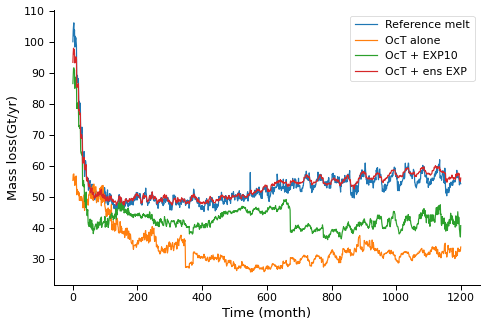

In [7]:
Onlyoc_id = 1649604319 #Only trained on OcT
Recalib_id = 1649628838 #OcT + EXP10
Composite_id = 1651150755 #OcT + ensemble de 4 EXP
Mod = [{'Ocean' : OcT, 'Uniq_id' : Onlyoc_id}, 
       {'Ocean' : OcTPlus, 'Uniq_id' : Recalib_id},
       {'Ocean' : Train_oc_exp, 'Uniq_id' : Composite_id}]
for oc in ALL_EXP:
    RMSE = Plotting.Plot_Melt_time_function(save = False, message = 0, Ocean_target = oc,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', Display_title = False,
            Labels = ['OcT alone', 'OcT + EXP10', 'OcT + ens EXP'])

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Done computing
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Done computing
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind


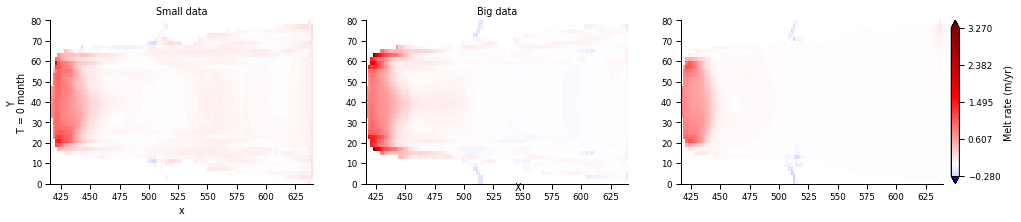

In [129]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 1}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 3, 'Extra_n' : 'Same_ind'}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Small data', 'Big data']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0], Oc_tar = 'Ocean4', save = True, Title = Titles,
                            One_profile = True)

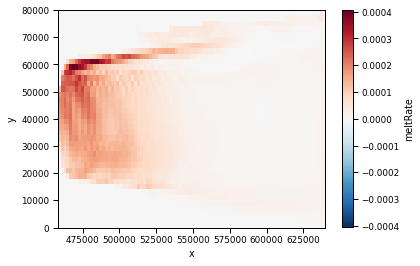

In [122]:
d.meltRate.sum(dim = 'date', skipna= True).plot()

In [ ]:
#Dataset[['meltRate', 'Mod_melt']]

In [ ]:
RMSEs = []
Model_id = 1653033955 # No lr changes Batchsize 1024

for oc in ALL_EXP:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Uniq_id' : Model_id}, Save_name = '')[0]
    RMSEs.append(RMSE)

Number of model used : 1
['CPL_EXP10_rst'] : [66.14421955] Gt/yr h_0-1653033955_Ex_                                                   

Number of model used : 1
['CPL_EXP11_rst'] : [43.26389378] Gt/yr h_0-1653033955_Ex_                                                   

Number of model used : 1
['CPL_EXP12_rst'] : [25.88802008] Gt/yr h_0-1653033955_Ex_                                                   

Number of model used : 1


Number of model used : 1
['Ocean1'] : [13.03016627] Gt/yr 96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   

Number of model used : 1
['Ocean2'] : [18.02882571] Gt/yr 96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   

Number of model used : 1
['Ocean3'] : [8.85577214] Gt/yr _96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   

Number of model used : 1
['Ocean4'] : [0.61470212] Gt/yr _96_96_96_Ch_0-1649604319_Ex_Same_ind                                                   



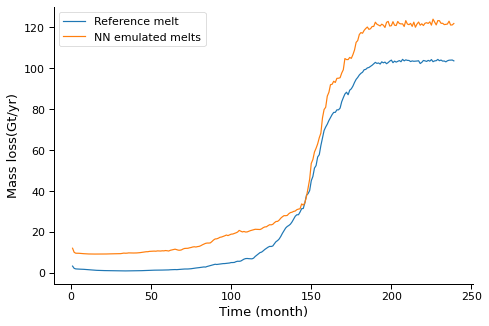

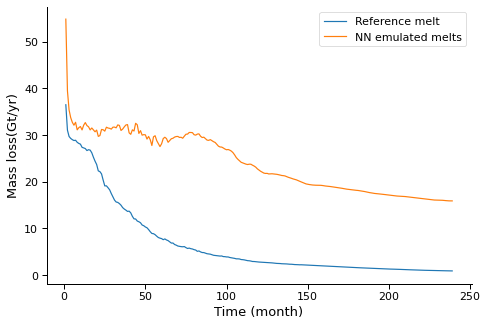

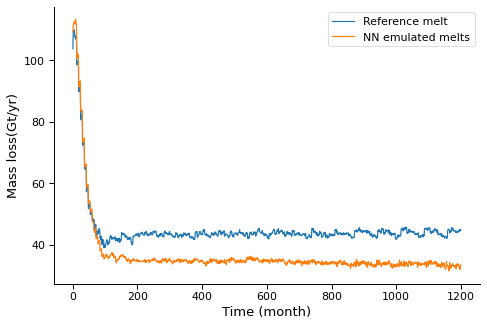

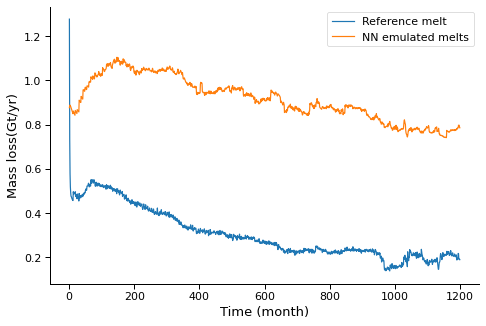

In [69]:
Model_id = 1649836902 #Plateau NN 
Model_id = 1649604319 # lr /2 ts les 10

Mod = {'Ocean' : OcT, 'Uniq_id' : Model_id}
Exp = ['CPL_EXP10_rst','CPL_EXP12_rst','CPL_EXP20_rst','CPL_EXP22_rst']
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'TYPb_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Labels = ['NN emulated melts'], Display_title = False )
    RMSE_cur.append(RMSE)

Number of model used : 1
['Ocean1'] : [7.88370967] Gt/yr 6_96_96_96_Ch_0-1650407902_Ex_                                                   

Number of model used : 1
['Ocean2'] : [21.55786827] Gt/yr _96_96_96_Ch_0-1650407902_Ex_                                                   

Number of model used : 1
['Ocean3'] : [5.43746383] Gt/yr 6_96_96_96_Ch_0-1650407902_Ex_                                                   

Number of model used : 1
['Ocean4'] : [0.76483863] Gt/yr 6_96_96_96_Ch_0-1650407902_Ex_                                                   



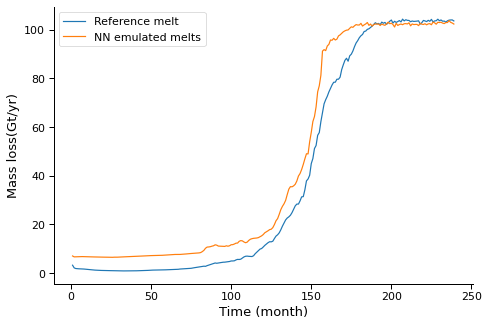

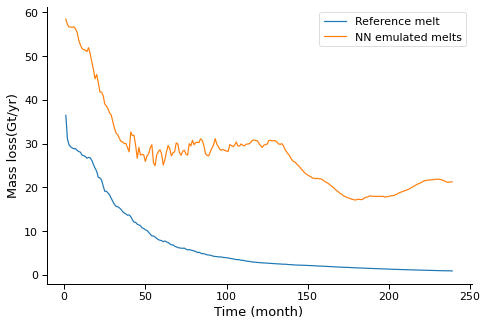

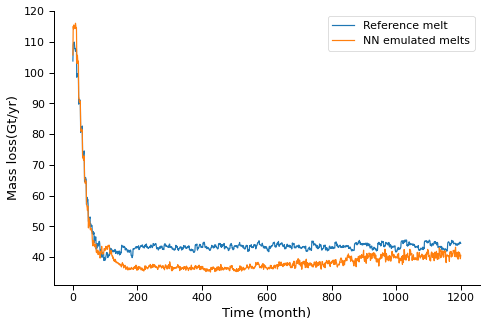

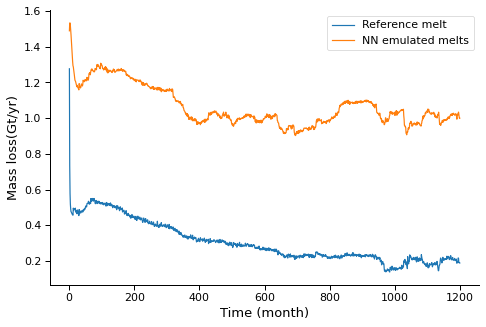

In [71]:
Model_id =  1650407902
Mod = {'Ocean' : Train_oc_exp, 'Uniq_id' : Model_id}
Exp = ['CPL_EXP10_rst','CPL_EXP12_rst','CPL_EXP20_rst','CPL_EXP22_rst']
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'TYPb_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Labels = ['NN emulated melts'], Display_title = False )
    RMSE_cur.append(RMSE)

In [70]:
OcTPlus

['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst']

Number of model used : 1
['CPL_EXP10_rst'] : [61.42157439] Gt/yr 6_Ch_0-1649604319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP12_rst'] : [26.39716825] Gt/yr 6_Ch_0-1649604319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP20_rst'] : [28.05637126] Gt/yr 6_Ch_0-1649604319_Ex_Same_ind                                                   

Number of model used : 1
['CPL_EXP22_rst'] : [31.8373225] Gt/yr 96_Ch_0-1649604319_Ex_Same_ind                                                   



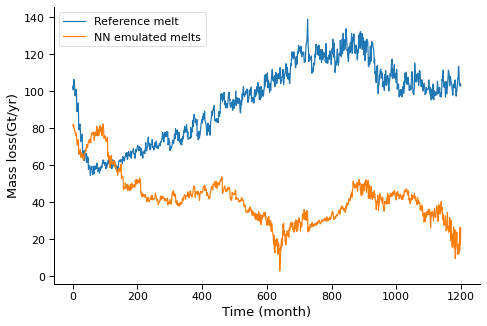

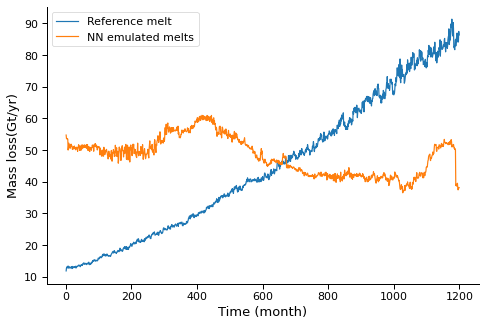

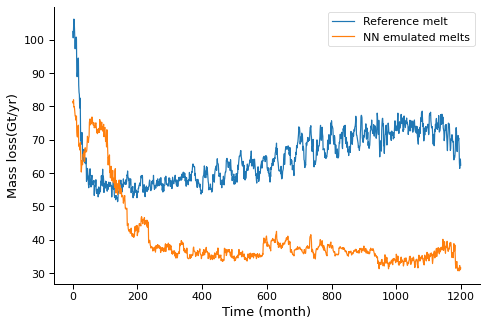

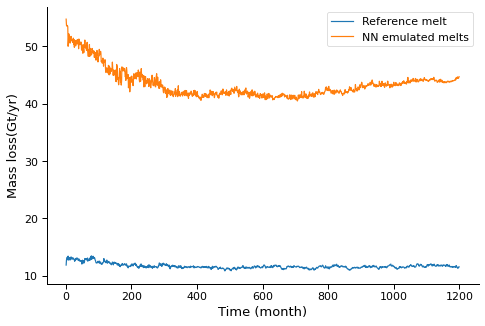

In [4]:
Model_id = 1649836902 #Plateau NN 
Model_id = 1649604319 # lr /2 ts les 10
Mod = {'Ocean' : OcT, 'Uniq_id' : Model_id}
Exp = ['CPL_EXP10_rst','CPL_EXP12_rst','CPL_EXP20_rst','CPL_EXP22_rst']
RMSE_cur = []
for OC_target in Exp:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = True, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Labels = ['NN emulated melts'], Display_title = False )
    RMSE_cur.append(RMSE)

['iceDraft', 'bathymetry', 'Slope_iceDraft', 'Slope_bathymetry', 'Big_T', 'Big_S', 'Distances_ground_line', 'Distances_front_line']
Number of model used : 1
['Ocean1'] : [1.38026742] Gt/yr _96_96_Ch_0-1652951334_Ex_                                                   

Number of model used : 1
['Ocean2'] : [1.05991579] Gt/yr _96_96_Ch_0-1652951334_Ex_                                                   

Number of model used : 1
['Ocean3'] : [0.90660097] Gt/yr _96_96_Ch_0-1652951334_Ex_                                                   

Number of model used : 1
['Ocean4'] : [0.07370299] Gt/yr _96_96_Ch_0-1652951334_Ex_                                                   



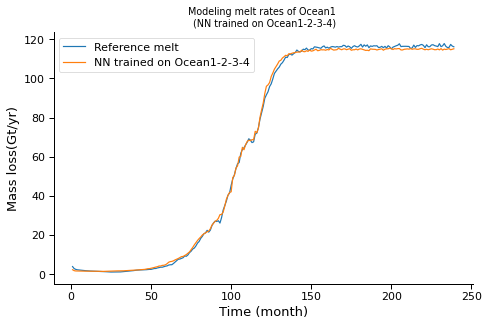

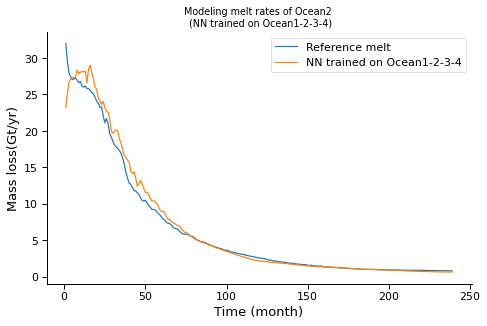

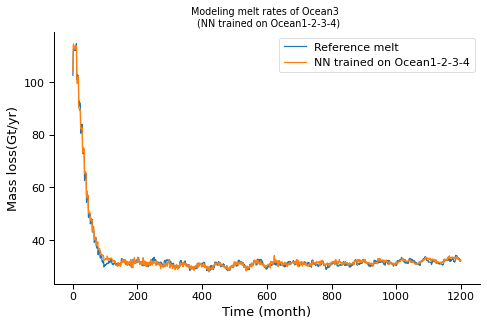

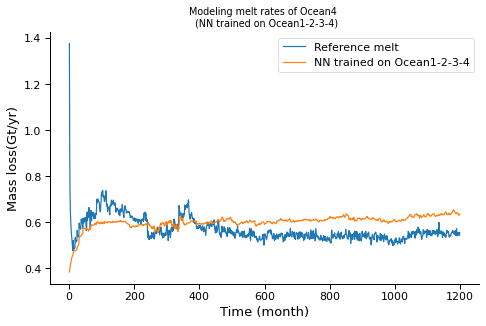

In [58]:
Vars = [Var_X_non_position, Var_X_BIG_test, Var_X_BIG_Step2,Var_X_BIG_Slope, Var_X_BIG_Extra]
RMSE_ALL = []
for i, v in enumerate(Vars[3:4]):
    print(v)
    Pick = [True if i == 0 else False]
    Mod = [{'Ocean' : OcT, 'Neur' : '32_32_96_96', 'index' : 0, 'Var' : v, 'Epoch' : 32, 'Exact' : True,
           'Pick_Best' : False}]
    RMSE_cur = []
    for OC_target in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '')
        RMSE_cur.append(RMSE)
    RMSE_ALL.append(RMSE_cur)

Ep_32_N_32_32_96_96_Ch_0-1652956285_Ex_


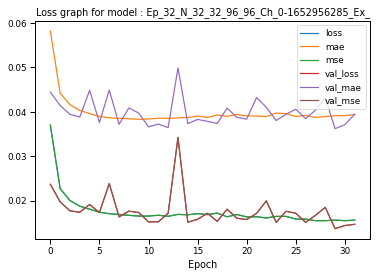

In [67]:
A = Plotting.Plot_loss_model(Ocean = OcT, Neur = '32_32_96_96', Epoch = 32, Scaling_lr = False, return_all = True, Var = Var_X_BIG_Extra)

In [66]:
Trainings.Get_model_path_json(Ocean = OcT, Neur = '32_32_96_96', Epoch = 32, Scaling_lr = False, return_all = True,
                             Var = Var_X_BIG_Extra)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1652956285_Ex_']

Number of model used : 1
['Ocean1'] : [3.38231562] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean2'] : [2.20655819] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean3'] : [3.01311614] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean4'] : [0.29885285] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean1'] : [1.74855401] Gt/yr 96_96_Ch_0-1648211452_Ex_ALL_T_S_initial                                                   

Number of model used : 1
['Ocean2'] : [1.59972657] Gt/yr 96_96_Ch_0-1648211452_Ex_ALL_T_S_initial                                                   

Number of model used : 1
['Ocean3'] : [1.5208159] Gt/yr _96_96_Ch_0-1648211452_Ex_ALL_T_S_initial                               

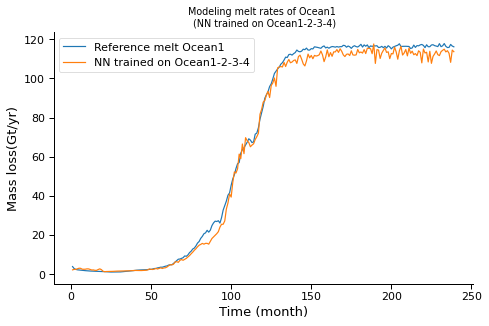

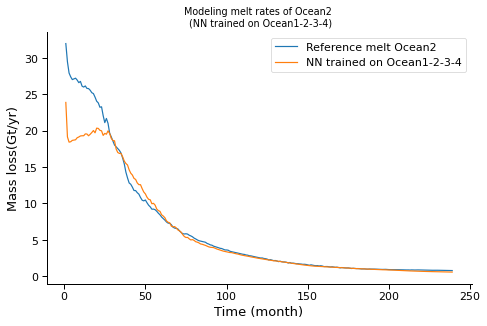

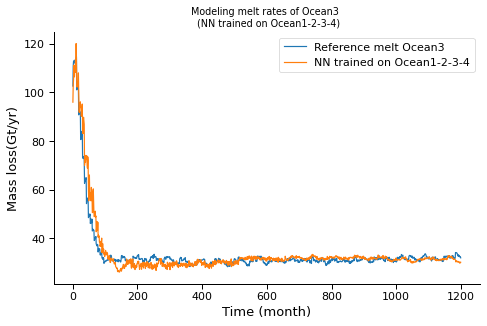

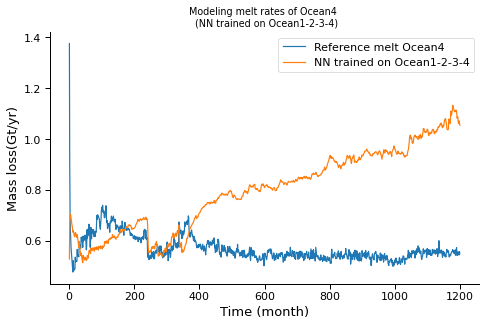

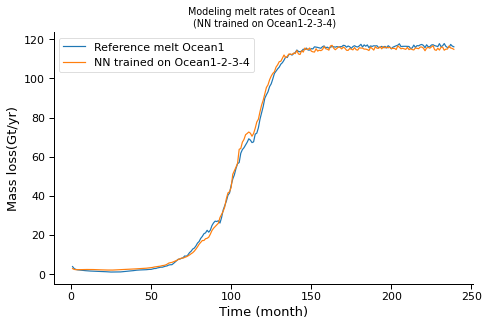

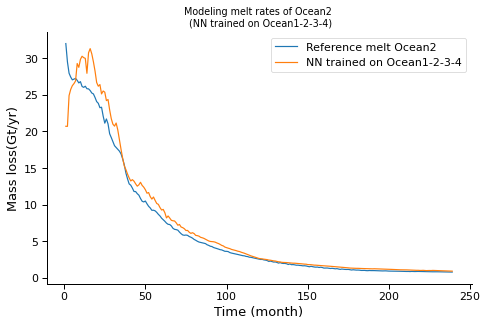

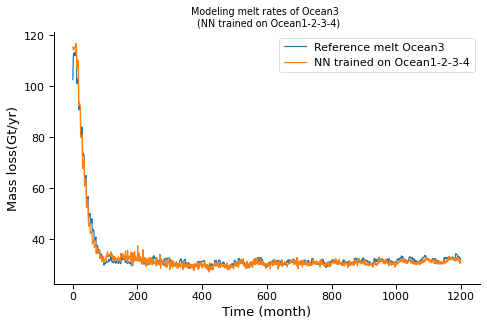

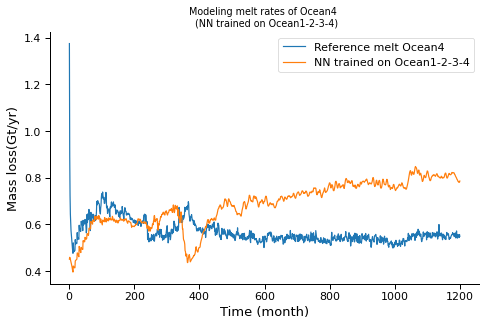

In [26]:
RMSE_ALL = []
Mod = [{'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_32_96_96', 
        'index' : 0,  'Var' : Var_X_non_position}, 
       {'Ocean' : OcT, 'Method_data' : 4, 'Neur' : '32_32_96_96', 
        'index' : 0,  'Var' : Var_X_BIG_test}
      ]

for m in Mod:
    for OC_target in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = m, Save_name = '')
        RMSE_ALL.append(RMSE)


In [24]:
m = {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_32_96_96', 'Var' : Var_X_non_position}
p = Trainings.Get_model_path_json(**m)
data = Trainings.Get_model_attributes(p[0])

In [25]:
p

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind']

In [1]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4']

Mods = [{'Epoch' : 8, 'Neur' : '32_64_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position_driving},
        {'Epoch' : 8, 'Neur' : '32_64_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

#Mods = [{'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position_driving}]
Titles=['Driving','Interpolation method 1']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = True, Title = Titles,
                            sharing = True)

NameError: name 'importlib' is not defined

Number of model used : 1
Number of model used : 1N_32_64_32_Ch_0-1652567567_Ex_Same_ind                                                   
Number of model used : 1N_32_64_32_Ch_0-1652710922_Ex_                                                   
['Ocean1'] : [2.35825824] Gt/yr 32_Ch_0-1652786869_Ex_                                                   



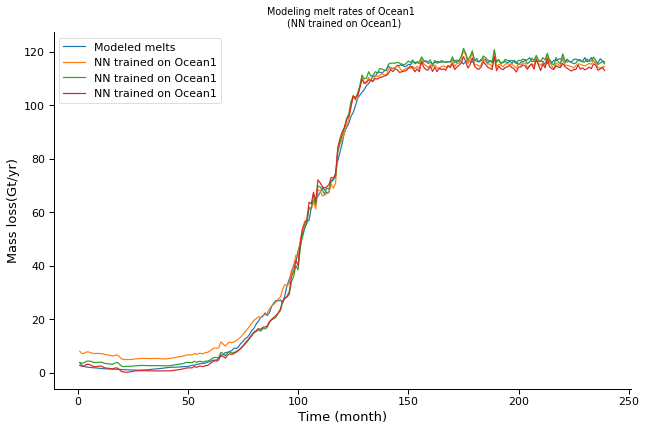

In [31]:
Mods = [{'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position},
        {'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position, 'index' : 1},
        {'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position, 'index' : 2}
       ]
RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = 'Ocean1',
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mods, Save_name = '')


In [29]:
RMSE

[array([8.53141564]), array([8.32278548])]

In [46]:
# importlib.reload(Plotting)
# importlib.reload(Computing_functions)
# Mod_att = {'Epoch' :8, 'Var' : Var_X_slopexy, 
#         'Extra_n' : 'Archi_bench_ep8_Var_X_slopexy', 'Ocean' : OcT, 'Choix' : 0}

# Mod_att = {'Epoch' :8, 'Var' : Var_X_non_position, 
#         'Extra_n' : 'Archi_bench_ep8_Var_X_nonposit', 'Ocean' : OcT, 'Choix' : 0}

# Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = False, Ocean_target = OcT, message = 0, 
#                 Time = True, NN_attributes = Mod_att, load = False, See_best = False)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean1'] : [1.73311457] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean2'] : [2.16550015] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean3'] : [2.95863442] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean4'] : [0.21198199] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/

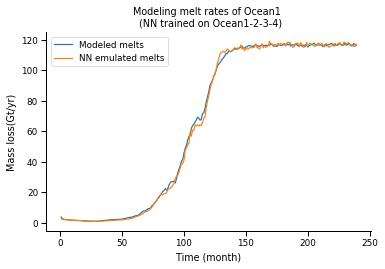

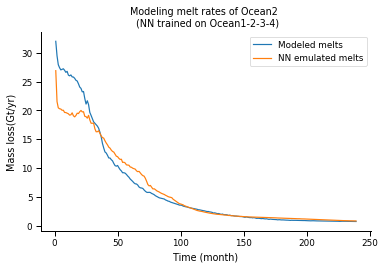

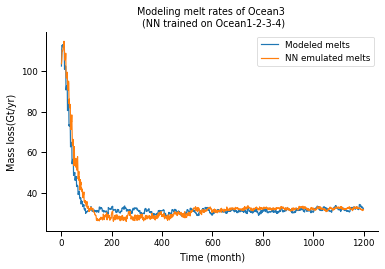

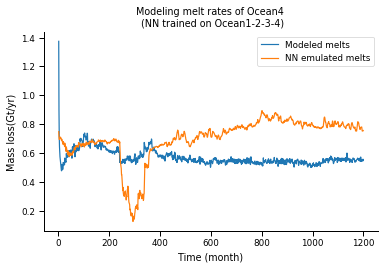

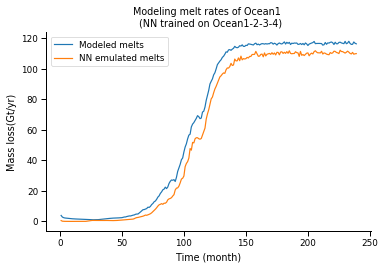

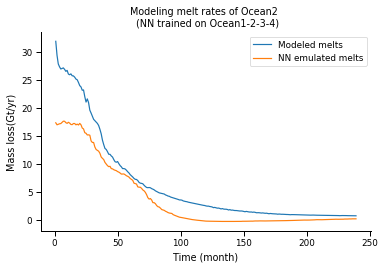

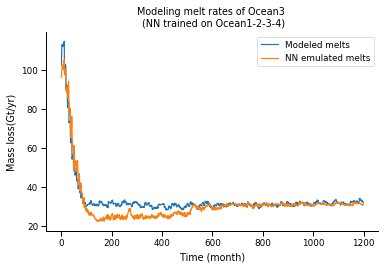

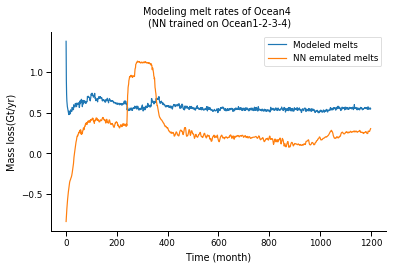

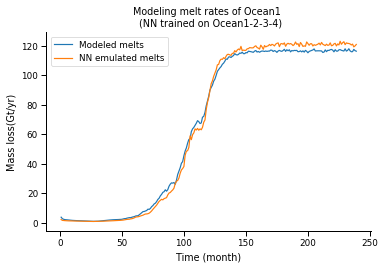

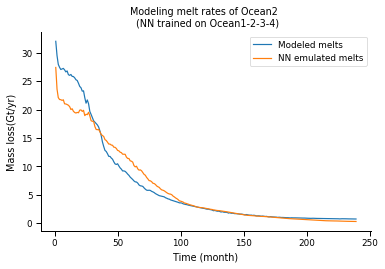

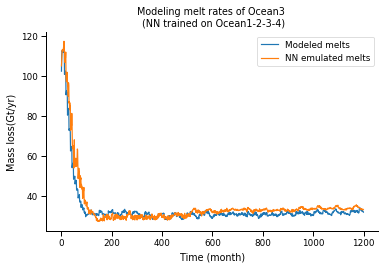

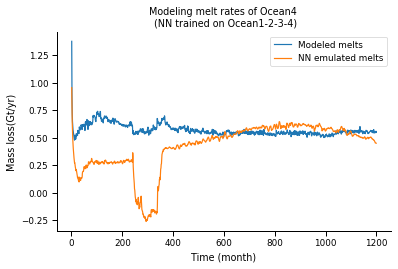

In [41]:
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Choix' : 0, 'Ocean' : OcT, 'Epoch' : 8,'Neur' : '64_64_64_96_96', 'Var' : Var_X_non_position}
        , {'Choix' : 1, 'Ocean' : OcT, 'Epoch' : 8, 'Neur' : '64_64_64_96_96', 'Var' : Var_X_non_position}
       ,{'Choix' : 2, 'Ocean' : OcT, 'Epoch' : 8, 'Neur' : '64_64_64_96_96', 'Var' : Var_X_non_position}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
#Titles=['Mean', 'Min' ,'Iqr']
#A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
#    Oc_tar = 'Ocean1', save = True, Title = Titles, sharing = True)
RMSEs = []
for Mod in Mods:
    Cur = []
    for oc in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 1,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = 'Ep128_Cutting10%')[0]
        Cur.append(RMSE)
    RMSEs.append(Cur)

In [16]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)

<module 'Scripts.Computing_functions' from '/home/bouissob/Code/Scripts/Computing_functions.py'>

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_96_96_96_96_96_Ch_0-1649836902_Ex_
Done computing
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_96_96_96_96_96_Ch_0-1649836902_Ex_


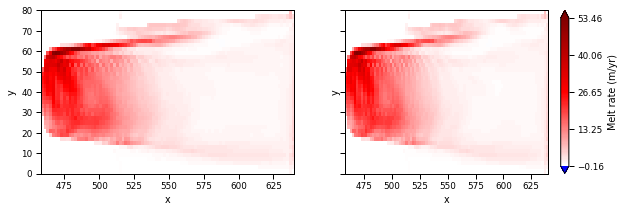

In [118]:
Oc = 'Ocean1'
d = Plotting.Plot_spatial_RMSE(Trainings.model_NN, ind = 2, save = True, NN_attrib = {'Ocean' : OcT, 
            'Method_data' : 4, 'Epoch' : 80, 'Exact' : True}, Oc_tar = Oc, Type_tar = 'COM_NEMO-CNRS', Type = 'CumSum')

In [34]:

A['Mod_melt'] = d.meltRate - d.Mod_melt
A['meltRate'] = d.meltRate 

In [35]:
A

<xarray.DataArray (date: 240, y: 40, x: 91)>
array([[[            nan,             nan,             nan, ...,
                     nan, -9.59434262e-10,             nan],
        [            nan,             nan,             nan, ...,
         -2.32455179e-10,  1.60449101e-09,  1.76245133e-09],
        [            nan,             nan,             nan, ...,
          6.13299661e-10, -1.02226893e-08,  1.77857744e-09],
        ...,
        [            nan,             nan,             nan, ...,
          2.95528020e-10,  8.36060667e-10, -3.80284468e-10],
        [            nan,             nan,             nan, ...,
          2.95275786e-09,  3.14450640e-09,  1.96764296e-09],
        [            nan,             nan,             nan, ...,
                     nan,  2.60233564e-09,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan, -2.44264832e-09,             nan],
        [            nan,             nan,             nan, ...,
         -1.88121642e-09, -6.31493256e-10,  3.39164494e-10],
        [            nan,             nan,             nan, ...,
         -9.44061457e-10, -1.38616491e-08, -3.90277547e-10],
...
        [            nan,             nan,             nan, ...,
          4.17123931e-10, -5.16266575e-10,  2.83356609e-09],
        [            nan,             nan,             nan, ...,
          1.11362432e-09, -4.76303253e-09, -6.18798455e-10],
        [            nan,             nan,             nan, ...,
                     nan, -4.24233748e-09,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan, -3.37157461e-09,             nan],
        [            nan,             nan,             nan, ...,
         -3.18352015e-10,  4.15761377e-09,  1.44467092e-08],
        [            nan,             nan,             nan, ...,
          5.39497037e-09,  6.11947653e-09,  3.60497183e-09],
        ...,
        [            nan,             nan,             nan, ...,
         -2.96682396e-09, -1.00401105e-09,  4.77600376e-10],
        [            nan,             nan,             nan, ...,
         -2.37384739e-09, -3.29919143e-09, -5.11333864e-09],
        [            nan,             nan,             nan, ...,
                     nan,  6.93572620e-09,             nan]]])
Coordinates:
  * date      (date) int64 0 1 2 3 4 5 6 7 8 ... 232 233 234 235 236 237 238 239
  * y         (y) float64 1e+03 3e+03 5e+03 7e+03 ... 7.5e+04 7.7e+04 7.9e+04
  * x         (x) float64 4.59e+05 4.61e+05 4.63e+05 ... 6.37e+05 6.39e+05
    Mod_melt  (date, y, x) float64 nan nan nan nan nan ... nan nan 6.936e-09 nan
    meltRate  (date, y, x) float64 nan nan nan nan nan ... nan nan 3.877e-07 nan

In [47]:
tmx = max(d.date).values
li_pos = []
li_negat = []
yr_to_s = 365*24*3600
for t in range(tmx+1):
    Cur = d.isel(date = t)[['Mod_melt', 'meltRate']].to_dataframe().reset_index()
    Cur['Diff'] = (Cur['Mod_melt'] - Cur['meltRate']) * yr_to_s
    li_pos.append(Cur.loc[Cur.Diff >= 0])
    li_negat.append(Cur.loc[Cur.Diff < 0])
df_pos = pd.concat(li_pos, ignore_index= True).set_index(['date', 'y', 'x']).to_xarray()
df_negat = pd.concat(li_negat, ignore_index= True).set_index(['date', 'y', 'x']).to_xarray()

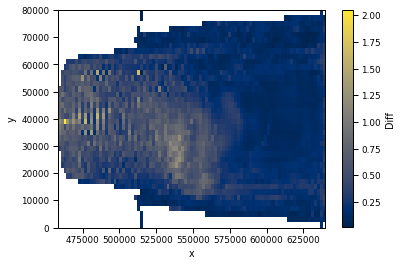

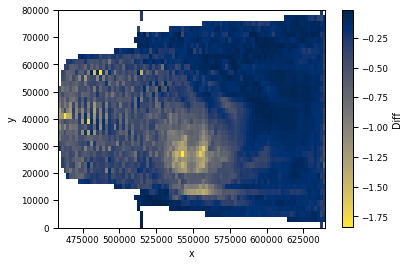

In [62]:
df_pos.Diff.mean(dim = 'date', skipna= True).plot(cmap = 'cividis')

plt.figure()

df_negat.Diff.mean(dim = 'date', skipna= True).plot(cmap = 'cividis_r')

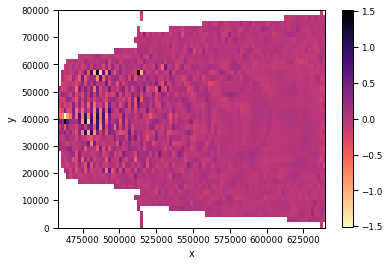

In [63]:
((d.Mod_melt - d.meltRate).mean(dim = 'date', skipna= True) * yr_to_s).plot(cmap = 'magma_r') 

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean1'] : [5.21194657] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean2'] : [1.42562701] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean3'] : [3.42587306] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean4'] : [0.13622598] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                     

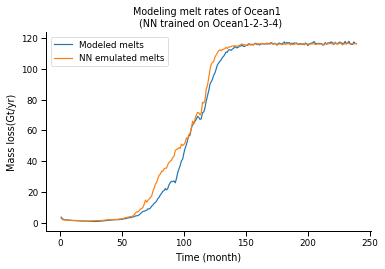

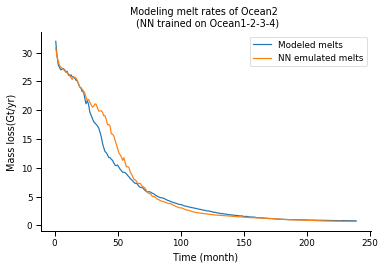

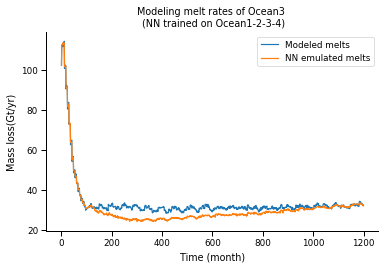

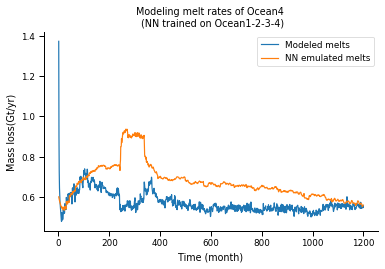

In [7]:
RMSEs = []
Suffix = '_fill100'
for oc in OcT:
    #oc+=Suffix
    RMSE = Plotting.Plot_Melt_time_function(ind = 1,save = True, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Epoch' : 128}, Save_name = 'Ep128_Cutting10%')[0]
    RMSEs.append(RMSE)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean1'] : [14.46326921] Gt/yr _96_96_96_Ch_0-1651230990_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean2'] : [0.2945306] Gt/yr 96_96_96_96_Ch_0-1651230990_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean3'] : [0.73434785] Gt/yr 6_96_96_96_Ch_0-1651230990_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean4'] : [0.05800319] Gt/yr 6_96_96_96_Ch_0-1651230990_Ex_                                                   



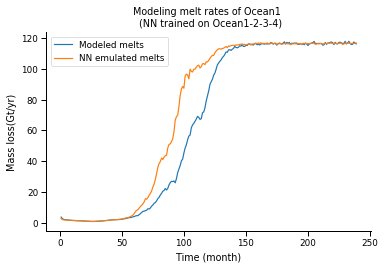

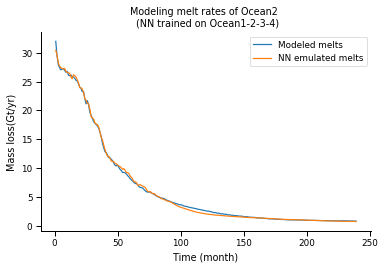

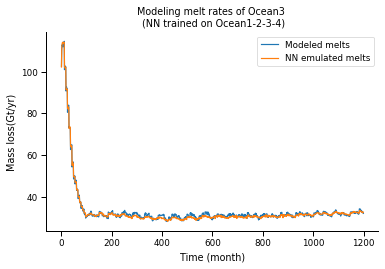

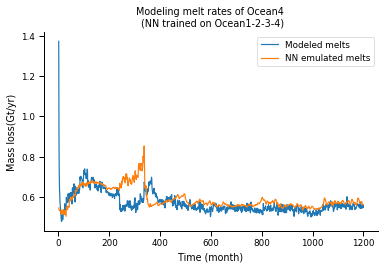

In [8]:
RMSEs = []
Suffix = '_fill100'
for oc in OcT:
    #oc+=Suffix
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Epoch' : 128}, Save_name = 'Ep128_Cutting20%')[0]
    RMSEs.append(RMSE)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1650362530_Ex_']
['Ocean1'] : [0.55546676] Gt/yr 128_128_128_128_Ch_0-1650362530_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1650362530_Ex_']
['Ocean2'] : [0.17217171] Gt/yr 128_128_128_128_Ch_0-1650362530_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1650362530_Ex_']
['Ocean3'] : [0.37556995] Gt/yr 128_128_128_128_Ch_0-1650362530_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1650362530_Ex_']
['Ocean4'] : [0.03929007] Gt/yr 128_128_128_128_Ch_0-1650362530_Ex_                                                   



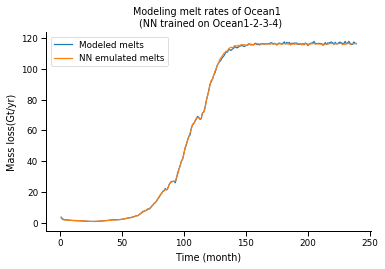

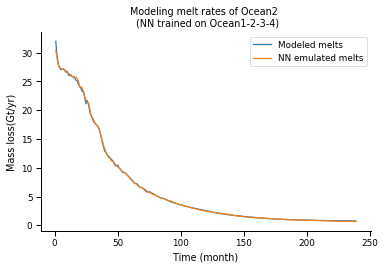

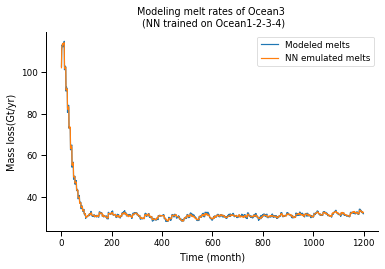

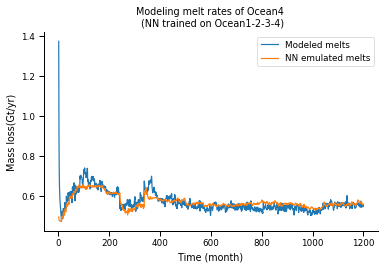

In [8]:
for oc in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 1,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Epoch' : 128})[0]
    RMSEs.append(RMSE)

In [4]:
#def __init__(self, Epoch = 2, Neur_seq = '32_64_64_32', Dataset_train = ['Ocean1'], Oc_mod_type = 'COM_NEMO-CNRS', 
#    Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], Var_Y = 'meltRate', activ_fct = 'swish', Norm_Choix = 0, verbose = 1, 
#    batch_size = 32, Extra_n = '', Better_cutting = False, Drop = None, Default_drop = 0.5, Method_data = None, Method_extent = [0, 40], 
#    Scaling_lr = False, Scaling_change = 2, Frequence_scaling_change = 8, Multi_thread = False, Workers = 1, TensorBoard_logs = False)

In [10]:
importlib.reload(Trainings)
Training = Trainings.Sequencial_training(Trainings.model_NN)
len(Training.Neur_seq_preview(5))

#class Sequencial_training():
#    def training(self, training_extent = 1, verbose = 1, Verify = 1,
#                 Standard_train = ['32_64_64_32'], **kwargs):
#New Better_cutting Var either False or Same_t 
# Same_t : Cut ocean3-4 to same time size as Ocean1-2

PWD : /home/bouissob/Code


46

In [12]:
Best_Neur = ['32_64_32'] #, '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
#Best_Neur = ['96_96_96_96_96'] #, '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
Training.training(training_extent = 0, verbose = 1, batch_size = 32, Exact = 1, message = 1,
            Standard_train = Best_Neur, Dataset_train = ['Ocean1'], Epoch = 8, 
            Var_X = Var_X_non_position, Verify = 0, Extra_n = 'Same_ind', 
            Similar_training = 0, Norm_Choix = 0, Method_data = 3, 
            Scaling_lr = False, Frequence_scaling_change = 8, Scaling_change = 5, TensorBoard_logs = True)

Projected training regiment :
 ['32_64_32']
Starting training for neurone : 32_64_32, 0/1 (Previous step : 0.000 s)
Getting dataset : Ocean1
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean1.csv
Check index
Begin Norma
Epoch 1/8
17448/17448 [==============================] - 35s 2ms/step - loss: 0.1942 - mae: 0.2331 - mse: 0.1942 - val_loss: 0.1537 - val_mae: 0.1915 - val_mse: 0.1537
Epoch 2/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1538 - mae: 0.1925 - mse: 0.1538 - val_loss: 0.1359 - val_mae: 0.1866 - val_mse: 0.1359
Epoch 3/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1421 - mae: 0.1864 - mse: 0.1421 - val_loss: 0.1300 - val_mae: 0.1821 - val_mse: 0.1300
Epoch 4/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1295 - mae: 0.1771 - mse: 0.1295 - val_loss: 0.1189 - val_mae: 0.1693 - val_mse: 0.1189
Epoch 5/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1191 

In [6]:
OcT = ['Ocean1', 'Ocean2','Ocean3','Ocean4']

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[5.12373887]
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 47 / 239/rStarting 94 / 239/rStarting 141 / 239/rStarting 188 / 239/rStarting 235 / 239/r[4.49305391]
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind']
Data variables used : temperatureYZ salinityYZ iceDraft                                                   
Starting 239 / 1199/rStarting 478 / 1199/rStarting 717 / 1199/rStarting 956 / 1199/rStarting 1195 / 1199/r[7.070941

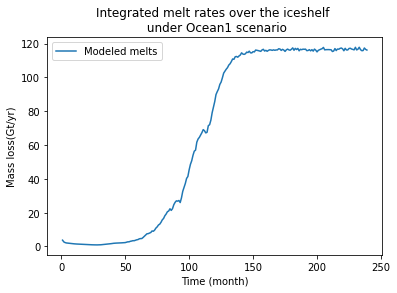

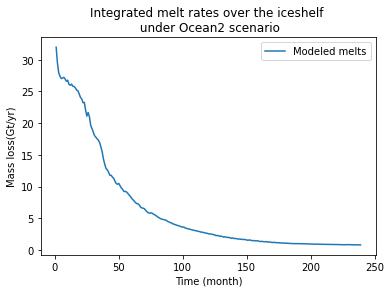

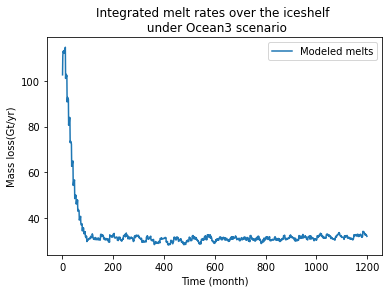

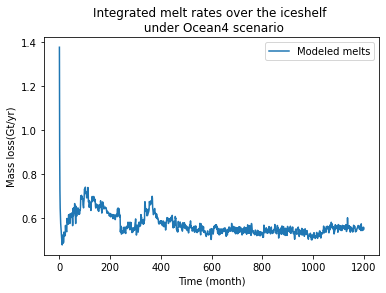

In [11]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
for Oc in OcT:
    Plotting.Plot_Melt_time_function(ind = 0,save = True, Save_name = Oc, Nothing = True, Indep = True, message = 1, Ocean_target = Oc, 
                NN_attributes = {'Epoch' : 8, 'Extra_n' : 'Same_ind', 'Neur' : '0' , 'Ocean' : OcT})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5']
[1.46733163] model Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind/model_26.h5                                                   


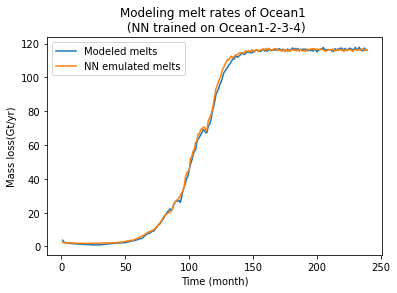

In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean1', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Pick_Best' : True, 'Exact' : True})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind']
[0.69049352] model Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind                                                   


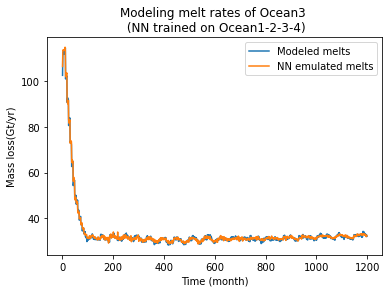

In [10]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean3', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : True, 'Pick_Best' : False})

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind']
[0.07631557] model Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind                                                   


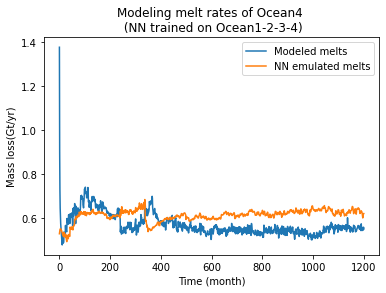

In [11]:
Plotting.Plot_Melt_time_function(save = True, message = 0, ind = 0,
                    Ocean_target = 'Ocean4', NN_attributes = {'Epoch' : 30 , 'Ocean' : OcT, 'Exact' : 1, 'Scaling_lr' : True, 'Pick_Best' : False})

In [22]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649013859_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649013859_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind


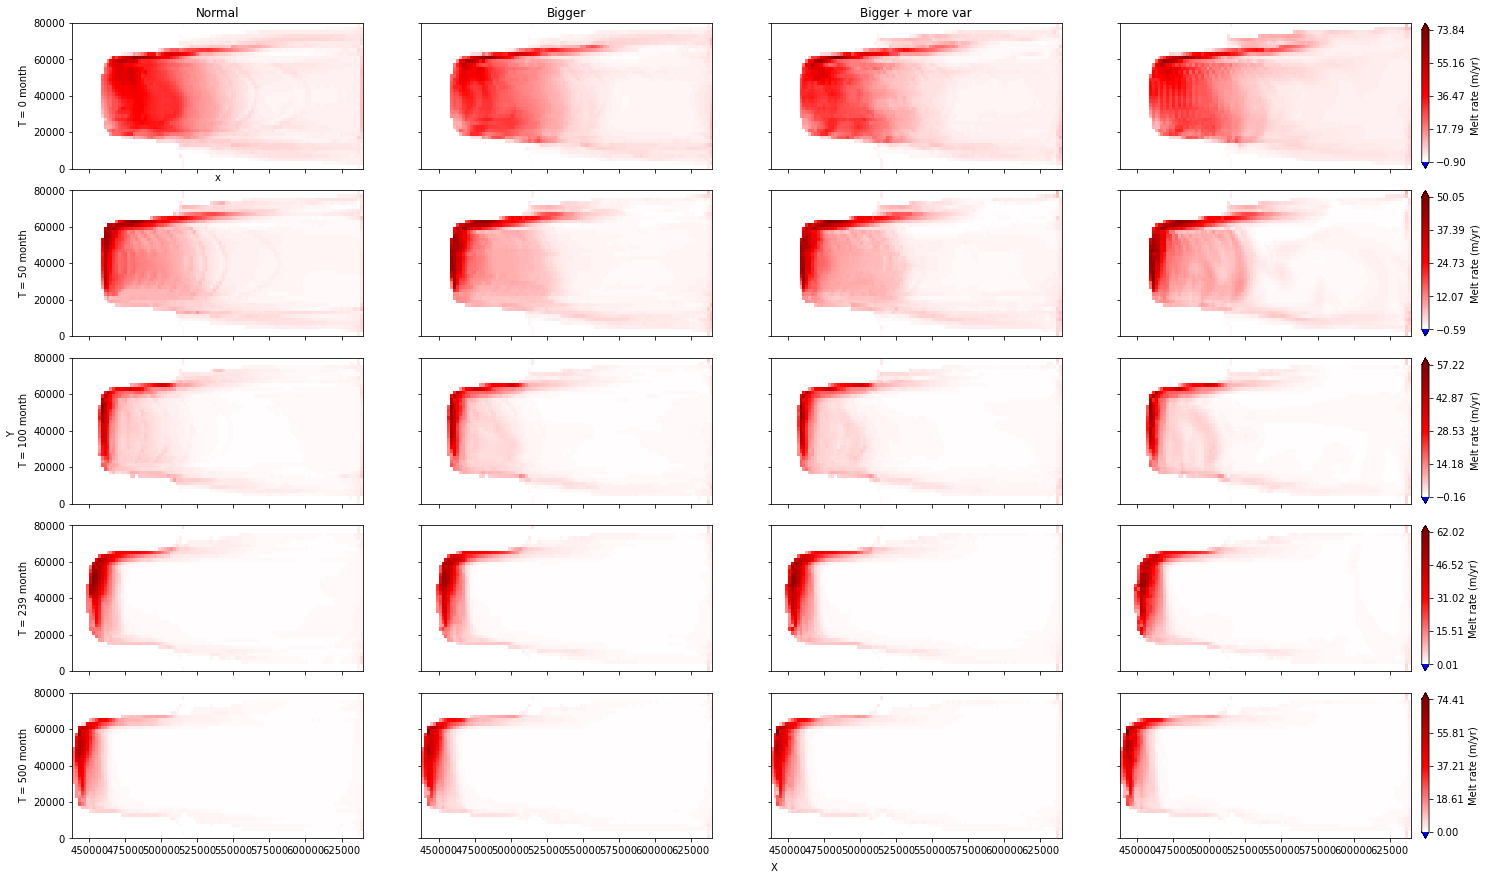

In [25]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 4}
        ,{'Epoch' : 30, 'Neur' : '96_96_96_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :0, 'Var' : Var_X_BIG},
        {'Epoch' : 30, 'Neur' : '96_96_96_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :0, 'Var' : Var_X_BIG_Extra}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

Titles=['Normal', 'Bigger', 'Bigger + more var']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500], 
                            Oc_tar = 'Ocean3', save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648198308_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648198308_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind
Fin

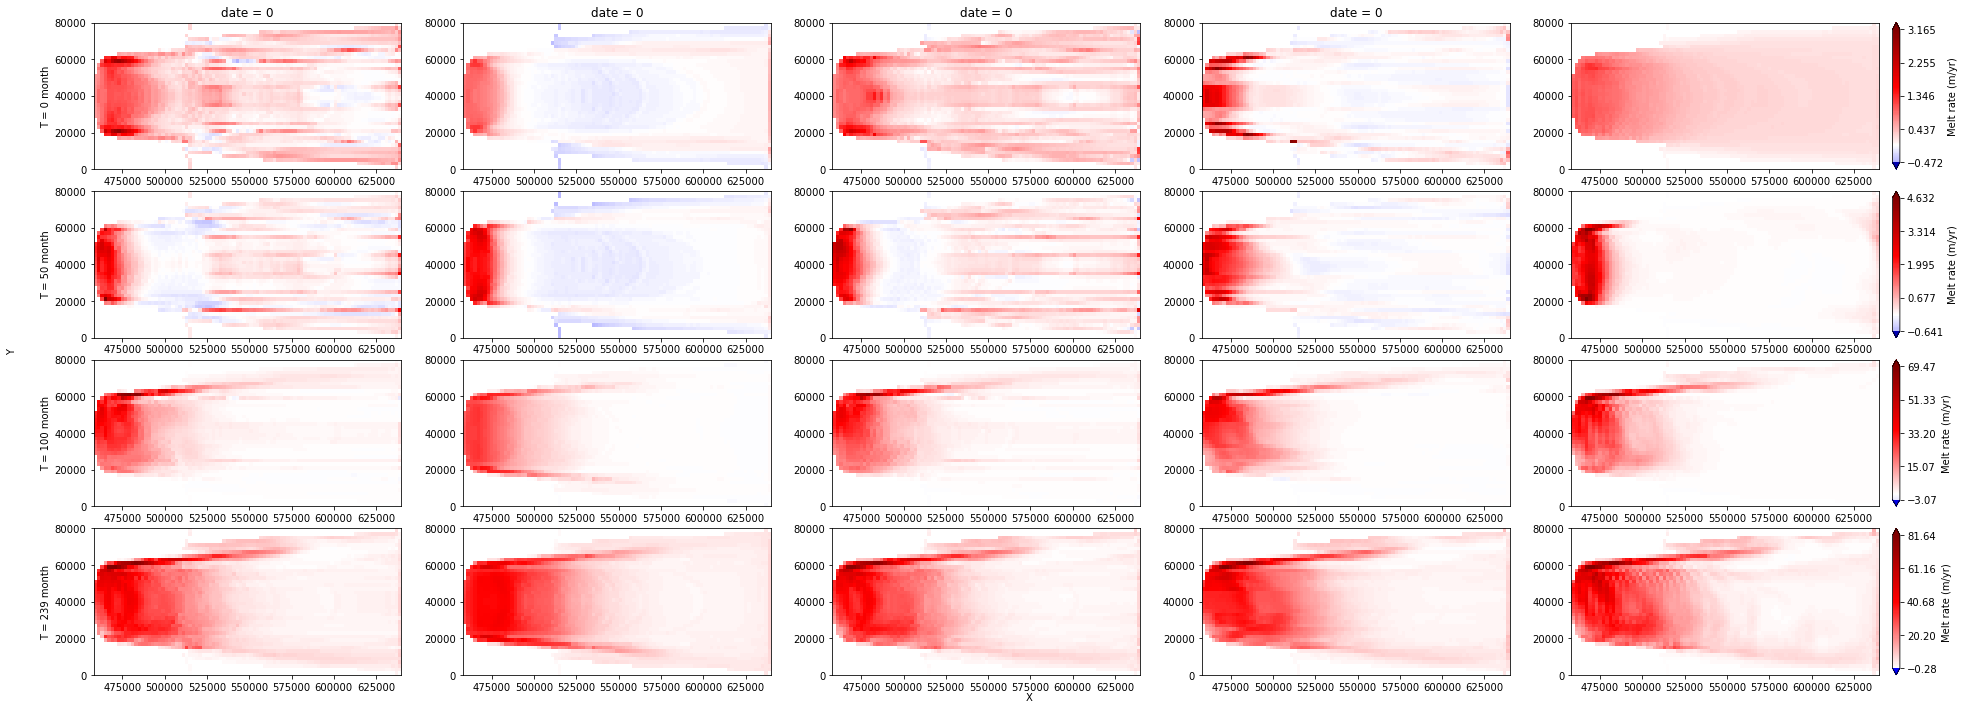

In [16]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 1}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 2, 'Extra_n' : 'Same_ind'}
        ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 3, 'Extra_n' : 'Same_ind'}
        ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :1}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Small data', 'Big data']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = True, Title = Titles)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_


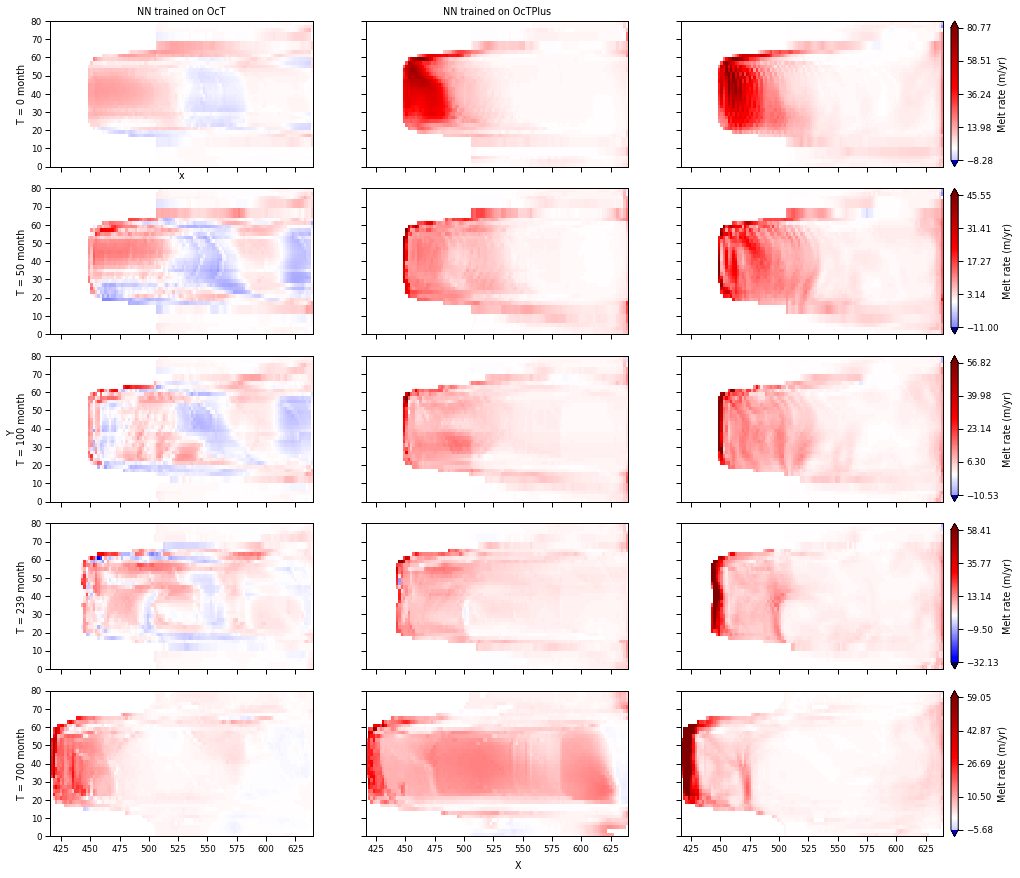

In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 80, 'Neur' : '96_96_96_96_96', 'Ocean' : OcT, 'Method_data' : 4},
        {'Epoch' : 30, 'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus,'Method_data' : 4}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['NN trained on OcT', 'NN trained on OcTPlus']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 700], 
    Oc_tar = 'CPL_EXP13_rst', Type_tar = 'FAVIER_2019' ,save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_


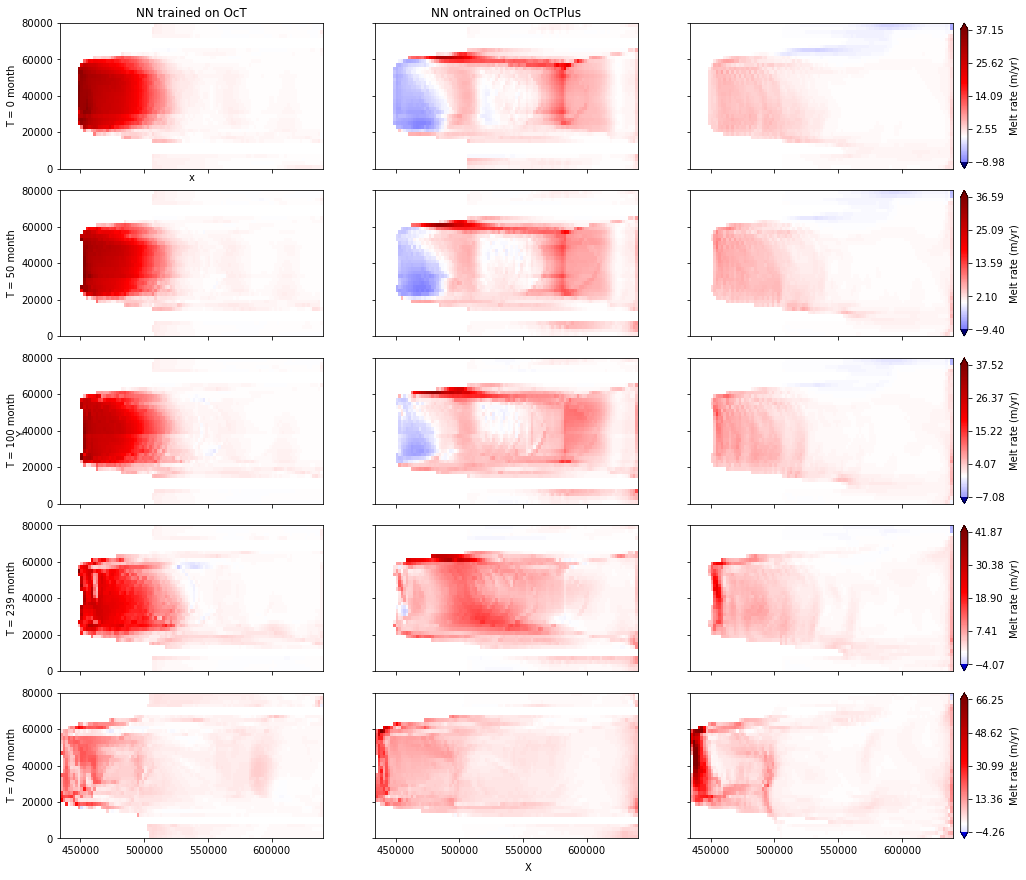

In [15]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 700], 
    Oc_tar = 'CPL_EXP12_rst', Type_tar = 'FAVIER_2019' ,save = True, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


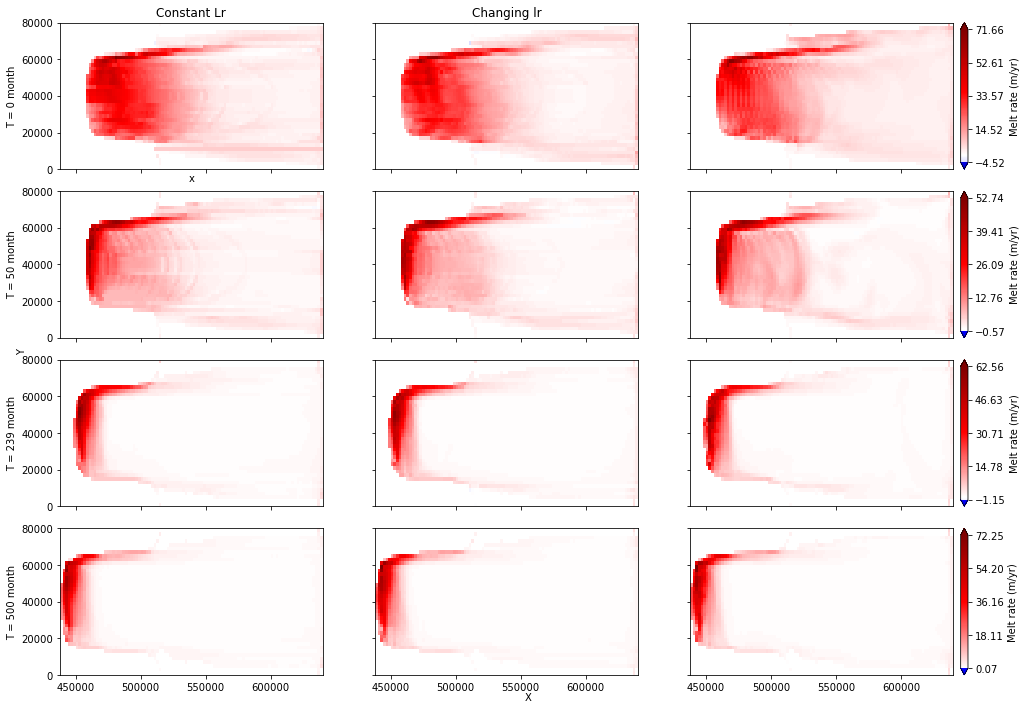

In [7]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)

A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 239, 500], 
    Oc_tar = 'Ocean3', save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


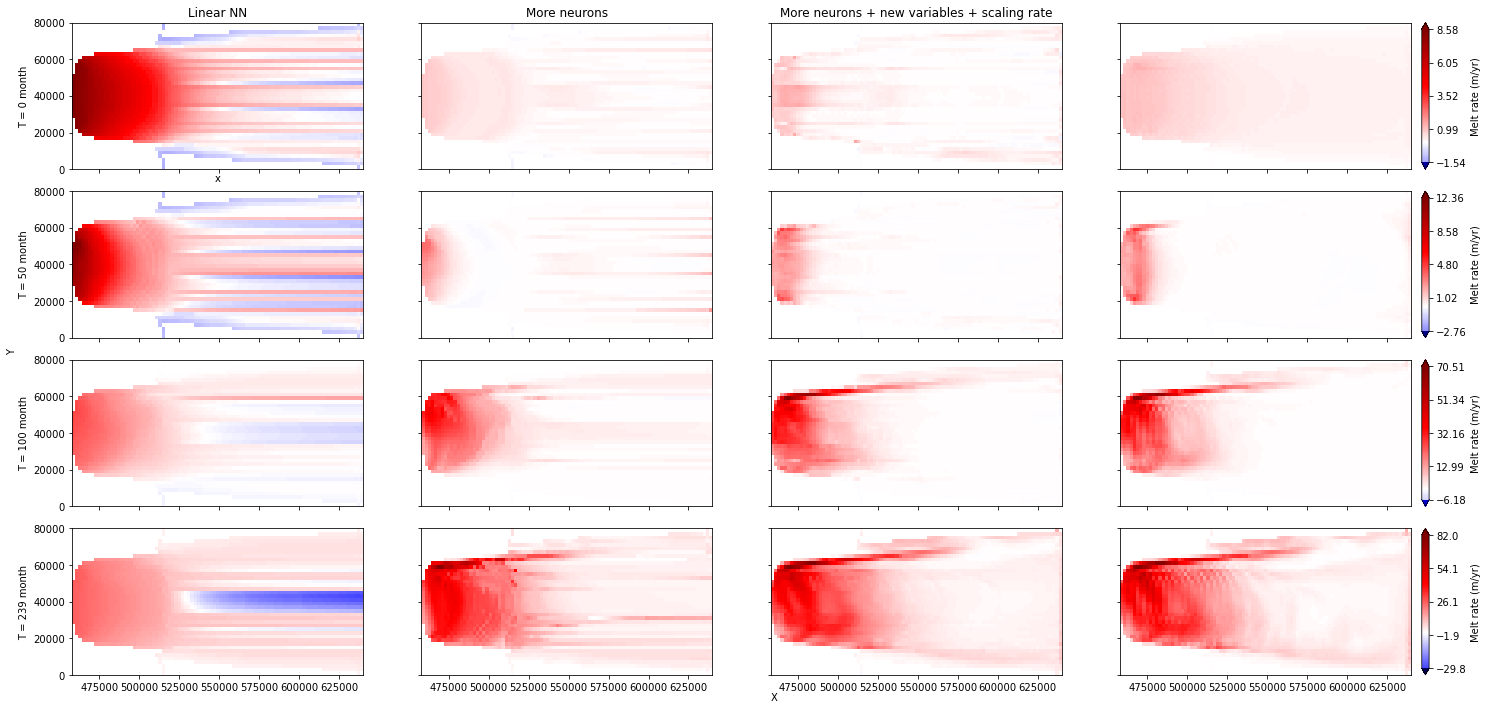

In [33]:
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '0', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 3}
        , {'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Var' : ['temperatureYZ', 'salinityYZ', 'iceDraft'], 'Method_data' : 3}
       ,{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind',
        'Scaling_lr' : True}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Linear NN', 'More neurons' ,'More neurons + new variables + scaling rate']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
    Oc_tar = 'Ocean1', save = True, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


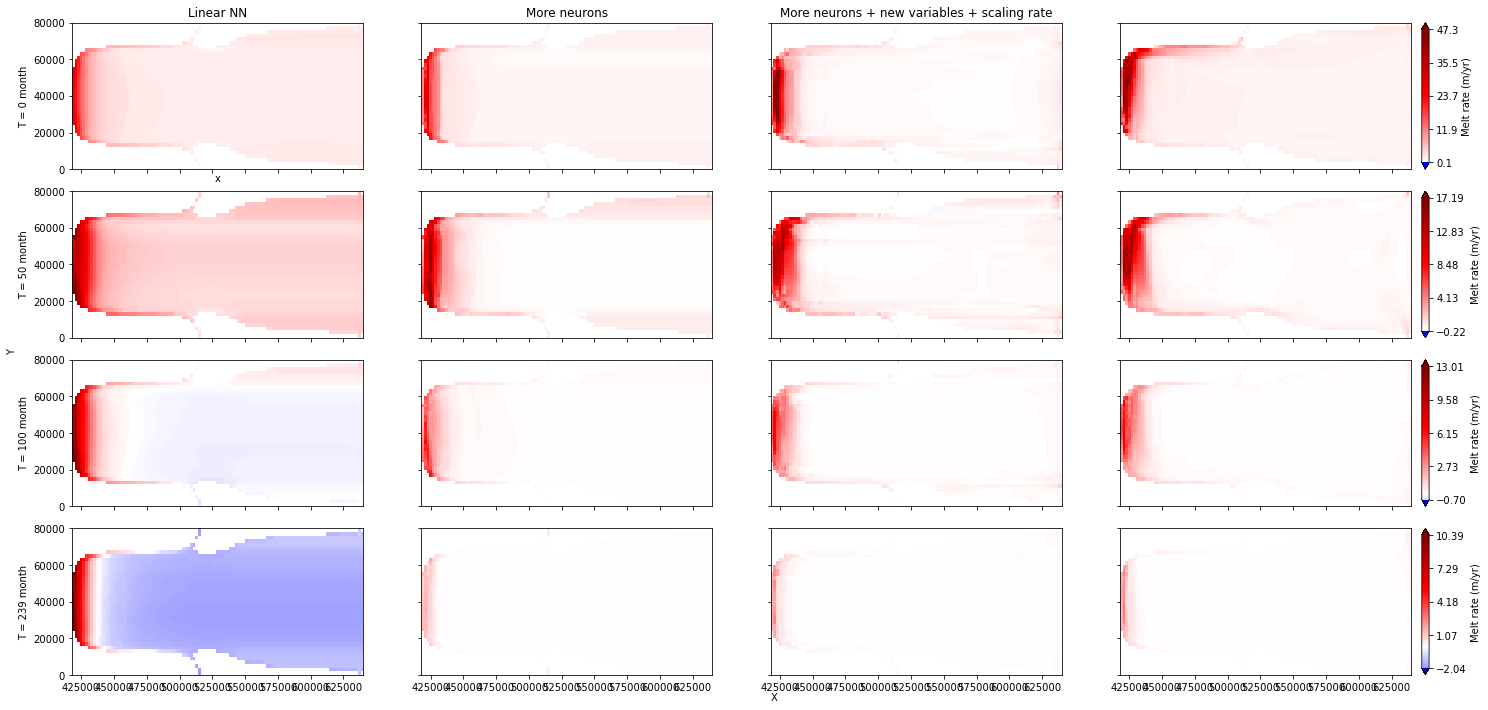

In [41]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
    Oc_tar = 'Ocean2', save = True, Title = Titles, sharing = True)

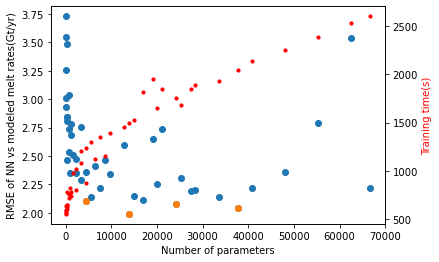

In [18]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
Mod_att = {'Epoch' :8, 'Var' : Var_X_non_position, 
        'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Choix' : 0}
Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = False, Ocean_target = OcT, message = 0, Time = True
                , NN_attributes = Mod_att, load = True, See_best = True)

In [10]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)

<module 'Scripts.Computing_functions' from '/home/bouissob/Code/Scripts/Computing_functions.py'>

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_Ch_0-1646935614_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_Ch_0-1646935614_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind


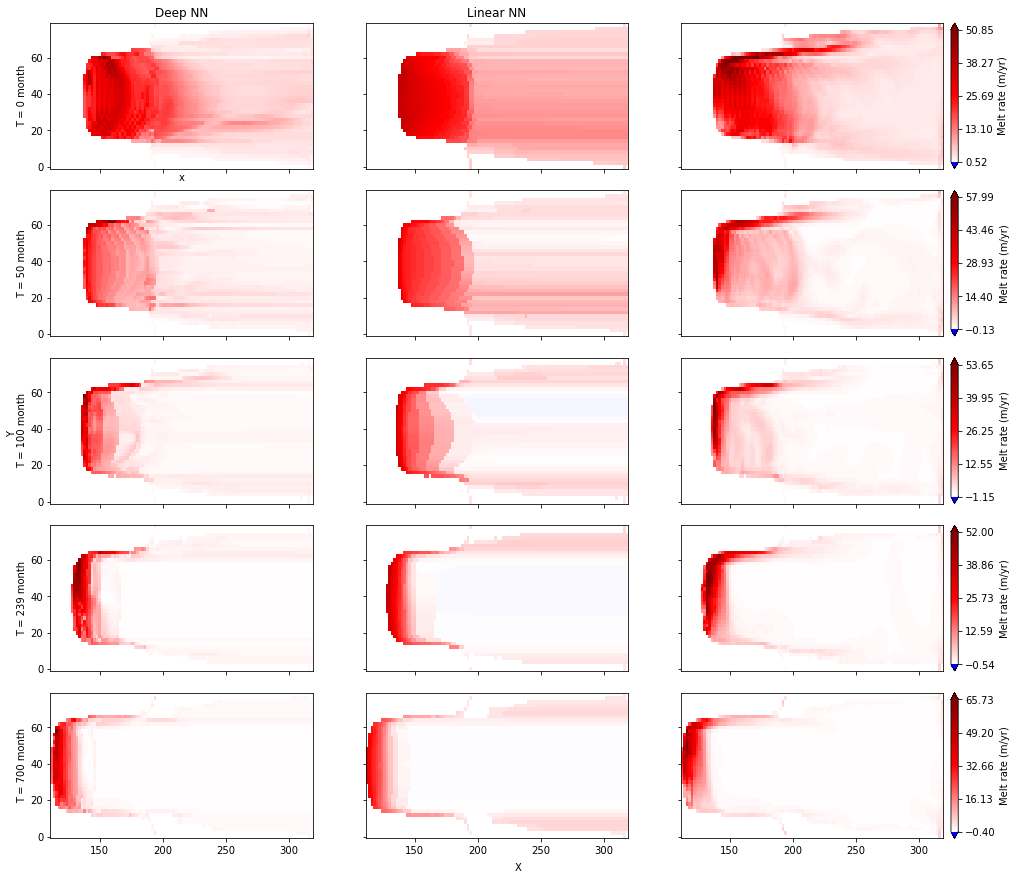

In [11]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '0', 'Ocean' : OcT}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Deep NN', 'Linear NN']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 700], 
    Oc_tar = 'Ocean3',save = False, Title = Titles, sharing = True)